<a href="https://colab.research.google.com/github/Shreya693/Shreya693/blob/main/Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
w = torch.tensor(3.0, requires_grad = True) # w = weight (slope)
b = torch.tensor(1.0, requires_grad = True) # b = bias (intercept)

In [3]:
def forward(x):
  y = w * x + b # formula of a straight line
  return y

In [4]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [5]:
x = torch.tensor([[4],[7]])

'''
❌ Wrong: torch.tensor([4],[7])

This looks like you're giving PyTorch two lists separately.

But torch.tensor() accepts only one argument (the data), not two.

So Python treats this as:

torch.tensor([4], [7])
             ↑     ↑
      first argument   second argument ❌


PyTorch doesn’t know how to handle that.

✅ Correct ways to create the tensor
✔ 1. 2D tensor ⇒ using a list of lists
x = torch.tensor([[4], [7]])


This means:

First row: [4]

Second row: [7]

Structure looks like:

[
  [4],
  [7]
]


Good for matrix-like input.
'''
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [6]:
# Linear Class
import torch
from torch.nn import Linear

In [7]:

torch.manual_seed(1)
model = Linear(in_features = 1, out_features = 1) # Linear(1,1) is literally a single neuron that performs linear regression.
print(model.bias, model.weight) #PyTorch automatically creates: weight → w and bias → b. Both start with small random values.

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [8]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


In [9]:
# Custom Models
import torch
import  torch.nn as nn
class LR(nn.Module): # nn.Module is the base class for all neural network components in PyTorch. So using nn.Module is like saying: “PyTorch, this is my neural network. Please manage its parameters, gradients, and training for me.”
  def __init__(self, input_size, output_size):
    super().__init__() # Initializes  parent class (nn.Module), so your custom model gets all the features (parameter tracking, GPU support, saving/loading, etc.).
    self.linear = nn.Linear(input_size, output_size) # creates a linear layer : y = wx + b

torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))


[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [10]:
# Custom Models using forward()
import torch
import  torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self,x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1,1)

x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<ViewBackward0>)


In [25]:
# Creating a dataset
import torch
import  torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

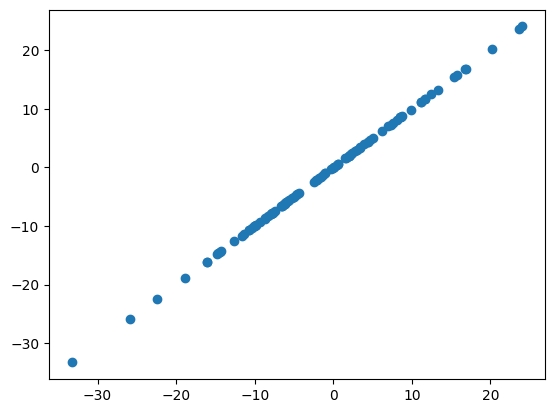

In [26]:
X = torch.randn(100,1) * 10 # creates 100 random numbers from a normal distribution (mean=0, std=1). "* 10" → spreads them out (makes them bigger)
y = X
plt.plot(X.numpy(),y.numpy(), 'o')

In [27]:
'''
HOW TO MANUALLY CERATE NOISE IN DATA?

USE: torch.randn(size)

'''

'\nHOW TO MANUALLY CERATE NOISE IN DATA?\n\nUSE: torch.randn(size)\n\n'

'\nExplanation for "y = X + 3 * torch.randn(100,1) * 10 "\n\n1. torch.randn(100,1) → random noise\n2. * 10 → make the noise larger\n3. * 3 → make the noise even stronger\n4. X + (noise) → adds noise to X\n\nSo instead of : 𝑦 = 𝑥 \n\nyou get : 𝑦 = 𝑥 + big random noise\n\n'

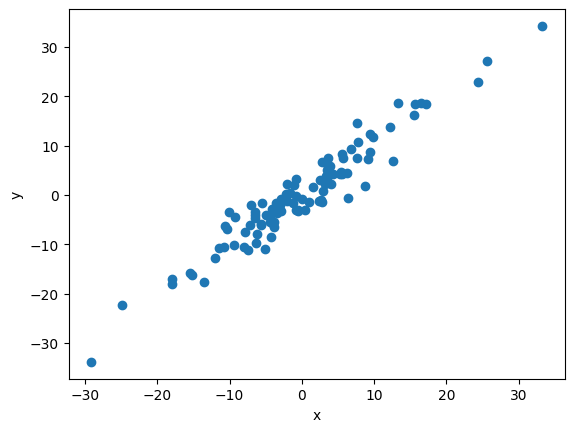

In [28]:
# create a noisy dataset of above
X = torch.randn(100,1) * 10
y = X + 3 * torch.randn(100,1)
plt.plot(X.numpy(),y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')


'''
Explanation for "y = X + 3 * torch.randn(100,1) * 10 "

1. torch.randn(100,1) → random noise
2. * 10 → make the noise larger
3. * 3 → make the noise even stronger
4. X + (noise) → adds noise to X

So instead of : 𝑦 = 𝑥

you get : 𝑦 = 𝑥 + big random noise

'''

In [29]:
# Model Class constructor
import torch
import  torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self,x):
    pred = self.linear(x)
    return pred

# Model Instantiation

torch.manual_seed(1)
model = LR(1,1)

print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [30]:
# Extracting Model Parameters
[w,b] = model.parameters()
w1 = w[0][0].item() # to return as a Python number instead of a Tensor type
b1 = b[0].item()
print(w1,b1)

0.5152631998062134 -0.44137823581695557


In [31]:
# create a functn for parameters (shortened version of prev code)
[w,b] = model.parameters()
def get_params():
  return(w[0][0].item(), b[0].item()) # return as tuple
get_params()

(0.5152631998062134, -0.44137823581695557)

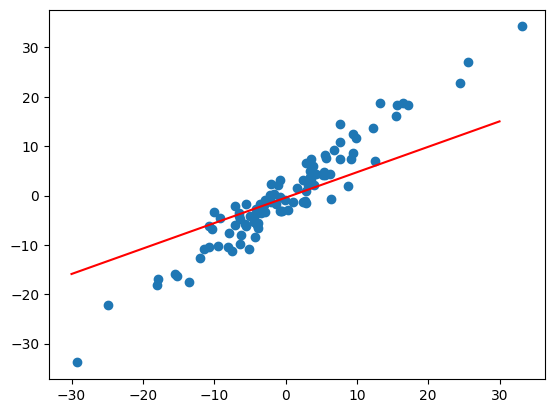

In [32]:
# Plotting Initial Model
def plot_fit(title):
  plt.title = title
  w1,b1 = get_params()
  x1 = np.array([-30,30])
  y1 = x1 * w1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,y)
  plt.show()

plot_fit('Initial Model')

In [33]:
'''
Loss = (prediction − actual) ^ 2
'''

'\nLoss = (prediction − actual) ^ 2\n'

In [34]:
import torch
import  torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Specifyiing Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [36]:
# Training Model
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred,y)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 31.37076187133789
epoch: 1 loss: 26.575855255126953
epoch: 2 loss: 22.768247604370117
epoch: 3 loss: 19.744230270385742
epoch: 4 loss: 17.342098236083984
epoch: 5 loss: 15.433533668518066
epoch: 6 loss: 13.916723251342773
epoch: 7 loss: 12.710882186889648
epoch: 8 loss: 11.751873016357422
epoch: 9 loss: 10.988826751708984
epoch: 10 loss: 10.381353378295898
epoch: 11 loss: 9.897418022155762
epoch: 12 loss: 9.511578559875488
epoch: 13 loss: 9.203653335571289
epoch: 14 loss: 8.957627296447754
epoch: 15 loss: 8.760783195495605
epoch: 16 loss: 8.603032112121582
epoch: 17 loss: 8.476362228393555
epoch: 18 loss: 8.37441635131836
epoch: 19 loss: 8.292144775390625
epoch: 20 loss: 8.225540161132812
epoch: 21 loss: 8.171420097351074
epoch: 22 loss: 8.1272554397583
epoch: 23 loss: 8.09104061126709
epoch: 24 loss: 8.061179161071777
epoch: 25 loss: 8.03640365600586
epoch: 26 loss: 8.015708923339844
epoch: 27 loss: 7.998291015625
epoch: 28 loss: 7.983513355255127
epoch: 29 loss: 7.9708

In [37]:
print(type(losses[0]), losses[0])


<class 'float'> 31.37076187133789


Text(0.5, 0, 'epoch')

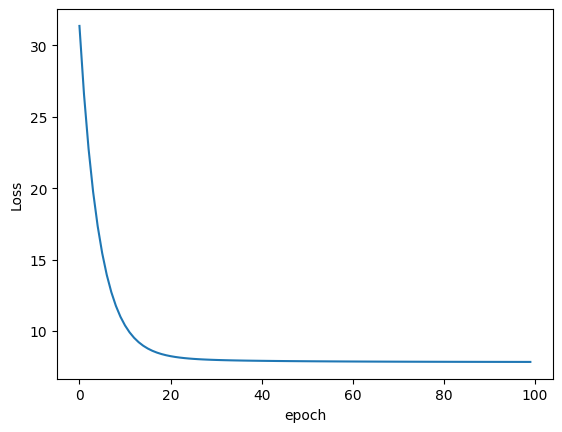

In [38]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

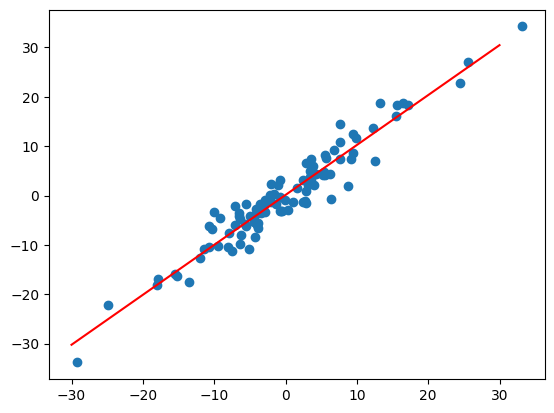

In [39]:
plot_fit('Trained Model')